In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

# CSV dosyasından veriyi okuma
# Dosya isminin doğru olduğundan emin olun
df = pd.read_csv(r"C:\Users\Seasw\OneDrive\Desktop\XAU_15m_data_2004_to_2024-20-09.csv.zip")

# Verinin boyutunu gösterme
print("\n Verinin boyutu (satır × sütun):")
print(df.shape)

# İlk 5 satırı gösterme
print("\n Verinin ilk 5 satırı:")
display(df.head())


 Verinin boyutu (satır × sütun):
(464737, 7)

 Verinin ilk 5 satırı:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,07:15,384.0,384.3,383.8,384.3,12
1,2004.06.11,07:30,383.8,384.3,383.6,383.8,12
2,2004.06.11,07:45,383.3,383.8,383.3,383.8,20
3,2004.06.11,08:00,383.8,384.1,383.6,383.6,8
4,2004.06.11,08:15,383.6,384.3,383.5,383.5,20


In [4]:
# Tarih sütununu datetime tipine çevirme
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Veriyi tarih sırasına göre sıralama
df = df.sort_values(by="Date")

# Eksik değerler
print("\n Eksik değer sayısı (Temizlik Öncesi):")
print(df.isnull().sum())

# Sayısal sütunlarda eksik değer varsa → ortalama ile doldur
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in numeric_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Tarih sütununda eksik varsa → satırı sil
if 'Date' in df.columns:
    df = df.dropna(subset=['Date'])

print("\n Eksik değerler işlendi.")


 Eksik değer sayısı (Temizlik Öncesi):
Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

 Eksik değerler işlendi.


 Altın Fiyatı Trend Grafiği oluşturuluyor


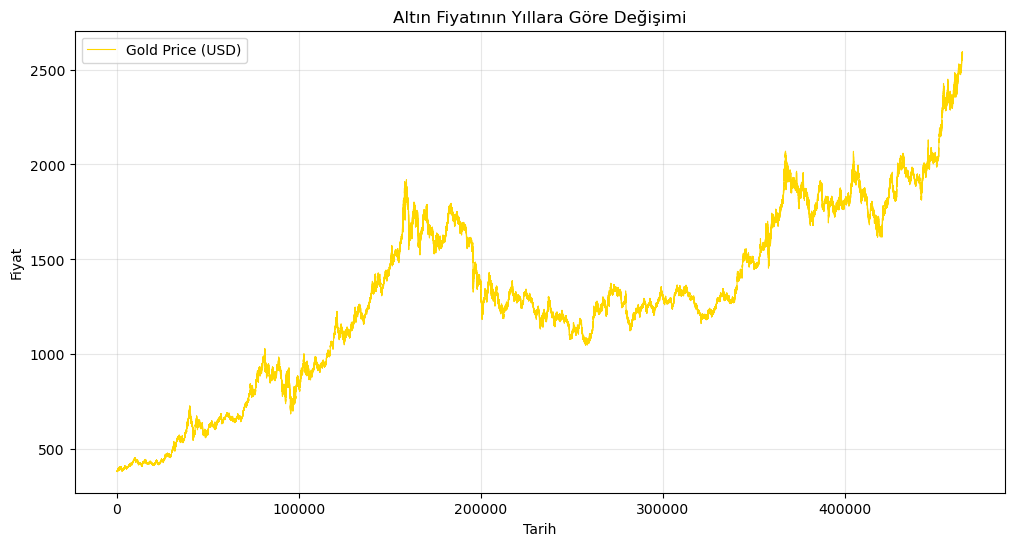


Korelasyon Isı Haritası oluşuyor


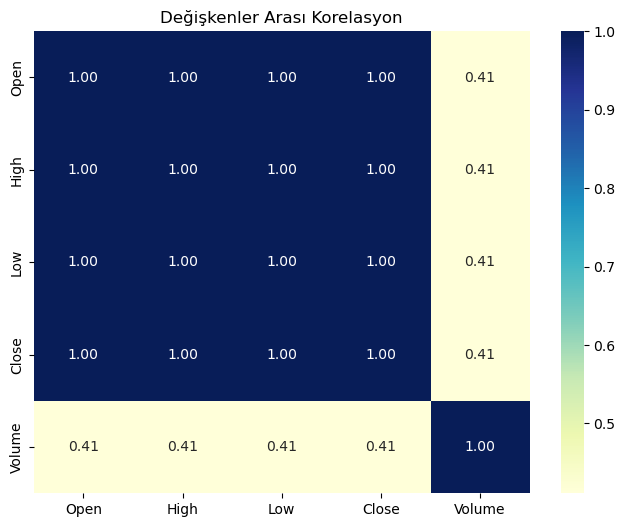

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik genel ayarları
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.unicode_minus"] = False

# Altın Fiyatı Zaman Serisi

print(" Altın Fiyatı Trend Grafiği oluşturuluyor")
plt.figure(figsize=(12, 6))

col_name = 'Gold_Price' if 'Gold_Price' in df.columns else 'Close'

plt.plot(df.index, df[col_name], label='Gold Price (USD)', color='gold', linewidth=0.8)
plt.title('Altın Fiyatının Yıllara Göre Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# GRAFİK: Korelasyon Isı Haritası

print("\nKorelasyon Isı Haritası oluşuyor")
plt.figure(figsize=(8, 6))

# Sadece sayısal sütunların korelasyonunu alır
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, 
            cmap='YlGnBu', 
            fmt='.2f')

plt.title('Değişkenler Arası Korelasyon')
plt.show()



In [9]:

print("\n Veri Seti İstatistiksel Özeti:")

# İstatistik özeti
ozet_tablo = df.describe().T
display(ozet_tablo)

print("\n Korelasyon Matrisi Değişkenler arası ilişki:")
# Bu sayede 'Time' veya 'Date' gibi sütunları atlayıp sadece sayıları hesaplar.
display(df.corr(numeric_only=True))



 Veri Seti İstatistiksel Özeti:


,count,mean,min,25%,50%,75%,max,std
Date,464737,2014-10-05 21:52:09.287317248,2004-06-11 00:00:00,2009-09-21 00:00:00,2014-11-03 00:00:00,2019-10-17 00:00:00,2024-09-20 00:00:00,NaN
Open,464737.0,1307.116626,381.3,1002.26,1287.11,1693.15,2594.16,469.786215
High,464737.0,1307.968012,381.6,1003.1,1287.75,1694.3,2600.0,470.059334
Low,464737.0,1306.245648,381.1,1001.41,1286.47,1692.08,2591.22,469.506512
Close,464737.0,1307.11676,381.3,1002.3,1287.11,1693.14,2594.18,469.7905
Volume,464737.0,852.995143,1.0,170.0,584.0,1148.0,50244.0,1069.354264



 Korelasyon Matrisi Değişkenler arası ilişki:


,Open,High,Low,Close,Volume
Open,1.000000,0.999997,0.999997,0.999995,0.411738
High,0.999997,1.000000,0.999994,0.999997,0.412355
Low,0.999997,0.999994,1.000000,0.999997,0.411045
Close,0.999995,0.999997,0.999997,1.000000,0.411697
Volume,0.411738,0.412355,0.411045,0.411697,1.000000


In [11]:
# Aykırı Değer Tespiti:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

print("\n Aykırı Değer Analizi: ")
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f" {col}: Aykırı değer sayısı = {len(outliers)}")


 Aykırı Değer Analizi: 
 Open: Aykırı değer sayısı = 0
 High: Aykırı değer sayısı = 0
 Low: Aykırı değer sayısı = 0
 Close: Aykırı değer sayısı = 0
 Volume: Aykırı değer sayısı = 24330


In [12]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Yeni Veri Türetme
# Sadece Open/Close yetmez modele trendi öğretiyoruz
df['SMA_5'] = df['Close'].rolling(window=5).mean()   # 5'li ortalama
df['SMA_20'] = df['Close'].rolling(window=20).mean() # 20'li ortalama
df['Lag_1'] = df['Close'].shift(1)  # Bir önceki fiyat
df['Lag_2'] = df['Close'].shift(2)  # İki önceki fiyat
df['Volatility'] = df['High'] - df['Low'] # değşiklik

# Yeni özelliklerden dolayı oluşan boş satırları temizle
df.dropna(inplace=True)

#  X ve y Tanımlama
# Tarih ve Hedef (Close) dışındaki her şey veri
X_temp = df.drop(['Date', 'Close'], axis=1)
if 'Time' in df.columns: # Eğer Time sütunu varsa onu da çıkar
    X_temp = X_temp.drop(['Time'], axis=1)

y = df['Close']

#  Feature Selection 
print(" Feature Selection yapılıyor")
# En iyi 5 özelliği seçiyoruz
selector = SelectKBest(score_func=mutual_info_regression, k=5)
X_selected = selector.fit_transform(X_temp, y)

# Seçilenleri yaz
mask = selector.get_support()
print(f" Seçilen Özellikler: {list(X_temp.columns[mask])}")

 Feature Selection yapılıyor
 Seçilen Özellikler: ['Open', 'High', 'Low', 'SMA_5', 'Lag_1']


In [13]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("\n PCA yapılıyor")

# 1. PCA Uygulama (%95 Varyans Koruma)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

print(f"Orijinal Boyut: {X_selected.shape[1]} -> PCA Sonrası: {X_pca.shape[1]}")

# Eğitim ve Test Olarak verileri Bölme
# Artık X_pca kullanıyoruz
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, shuffle=False, random_state=42
)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Veriler hazır")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")


 PCA yapılıyor
Orijinal Boyut: 5 -> PCA Sonrası: 1

 Veriler hazır
X_train: (371774, 1), X_test: (92944, 1)


Decision Tree eğtimi yapılıyor

 Decision Tree Sonuçlar
MAE: 42.74
RMSE: 117.61
R2 Skoru: 0.6609


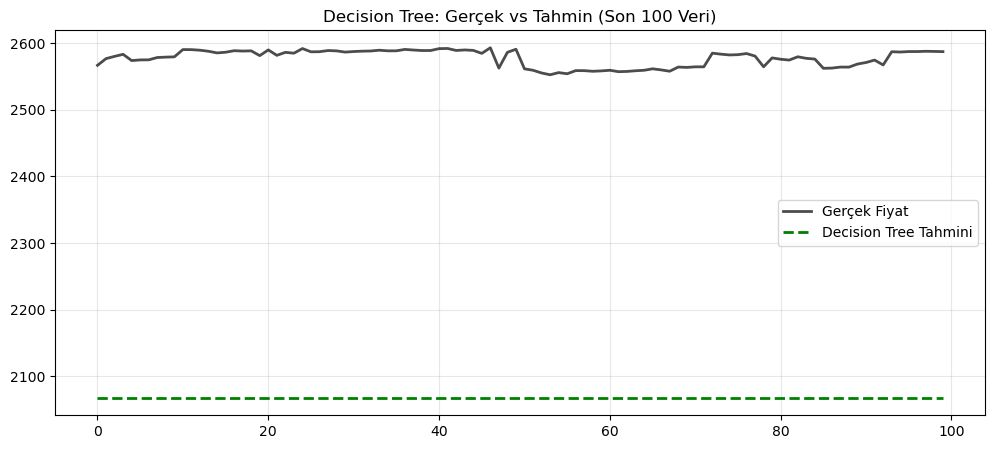

In [14]:
print("Decision Tree eğtimi yapılıyor")

# Modeli Kurma ve Eğitme
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Tahmin Yapma
dt_pred = dt_model.predict(X_test_scaled)

# Başarı Metrikleri
mae = mean_absolute_error(y_test, dt_pred)
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
r2 = r2_score(y_test, dt_pred)

print(f"\n Decision Tree Sonuçlar")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Skoru: {r2:.4f}")

# Grafik Çiz 
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[-100:], label='Gerçek Fiyat', color='black', linewidth=2, alpha=0.7)
plt.plot(dt_pred[-100:], label='Decision Tree Tahmini', color='green', linestyle='--', linewidth=2)
plt.title("Decision Tree: Gerçek vs Tahmin (Son 100 Veri)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

 SVR eğitimi yapılıyor 

 SVR Sonuçlar
MAE: 9.61
RMSE: 23.76
R2 Skoru: 0.9862


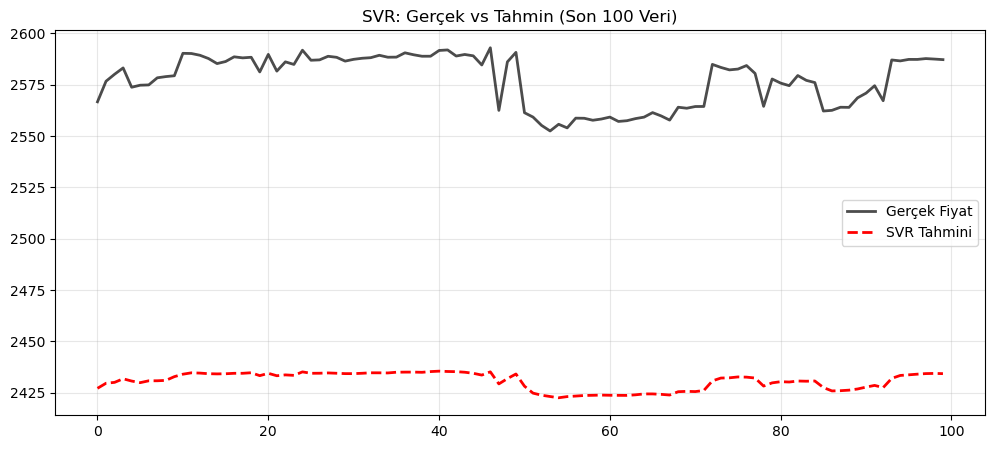

In [15]:
print(" SVR eğitimi yapılıyor ")

# Hız İçin Veri Azaltma
limit = 5000
X_train_svr = X_train_scaled[-limit:]
y_train_svr = y_train.iloc[-limit:]

# Modeli Kurma ve Eğitme
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_svr, y_train_svr)

# Tahmin Yapma
svr_pred = svr_model.predict(X_test_scaled)

# Başarı Metrikleri
mae = mean_absolute_error(y_test, svr_pred)
rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
r2 = r2_score(y_test, svr_pred)

print(f"\n SVR Sonuçlar")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Skoru: {r2:.4f}")

# Grafik Çiz 
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[-100:], label='Gerçek Fiyat', color='black', linewidth=2, alpha=0.7)
plt.plot(svr_pred[-100:], label='SVR Tahmini', color='red', linestyle='--', linewidth=2)
plt.title("SVR: Gerçek vs Tahmin (Son 100 Veri)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()